# Imports

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler

rng = np.random.RandomState(42)

# Load DF

In [9]:
file_path = 'DS/wine.csv'
wine_data = pd.read_csv(file_path)

# Define the target variable and features

In [10]:
target = 'Malic acid'
features = wine_data.columns.drop(target)

# Split the data into features (X) and target (y)

In [11]:
X = wine_data[features]
y = wine_data[target]

# Train-test split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rng)

# Standard Scaler for data normalization

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models

In [14]:
model1 = RandomForestRegressor(random_state=rng)
model2 = LinearRegression()
model3 = Ridge(random_state=rng)

# Cross-validation setup

In [15]:
kf = KFold(n_splits=5, shuffle=True, random_state=rng)

# Custom scorer for normalized mean absolute error (NMAE)

In [16]:
def nmae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) / np.mean(np.abs(y_true))

nmae_scorer = make_scorer(nmae, greater_is_better=False)

# List of metrics for cross-validation

In [17]:
scoring_metrics = {
    'MSE': 'neg_mean_squared_error',
    'RMSE': 'neg_root_mean_squared_error',
    'MAE': 'neg_mean_absolute_error',
    'R2': 'r2',
    'NMAE': nmae_scorer
}

# Function to perform cross-validation for all metrics

In [18]:
def cross_validate_all_metrics(model, X, y, cv, scoring_metrics):
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring_metrics, return_train_score=False, n_jobs=-1)
    mean_scores = {metric: -np.mean(scores[f'test_{metric}']) if 'neg_' in metric else np.mean(scores[f'test_{metric}']) for metric in scoring_metrics}
    return mean_scores

# Cross-validate models

In [19]:
cv_results_model1 = cross_validate_all_metrics(model1, X_train_scaled, y_train, kf, scoring_metrics)
cv_results_model2 = cross_validate_all_metrics(model2, X_train_scaled, y_train, kf, scoring_metrics)
cv_results_model3 = cross_validate_all_metrics(model3, X_train_scaled, y_train, kf, scoring_metrics)

# Plotting the Actual vs Predicted values for each model

In [20]:
def plot_actual_vs_predicted(model, X_train, y_train, X_test, y_test, title):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot(y_test, y_test, color='black')  # Diagonal line
    plt.title(f'Actual vs Predicted - {title}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

# Plot and metrics for each model

## Random Forest Regressor

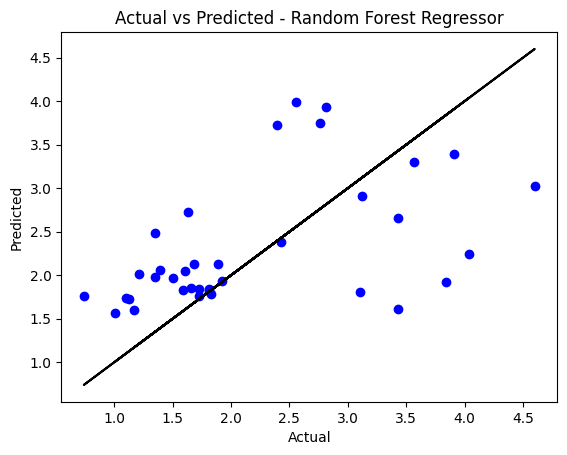

Random Forest Regressor {'MSE': -1.0239941600197047, 'RMSE': -1.0096439784148457, 'MAE': -0.7626247290640398, 'R2': 0.1468599458578202, 'NMAE': -0.3217299137532133}


In [21]:
plot_actual_vs_predicted(model1, X_train_scaled, y_train, X_test_scaled, y_test, 'Random Forest Regressor')
print("Random Forest Regressor", cv_results_model1)

## Linear Regression

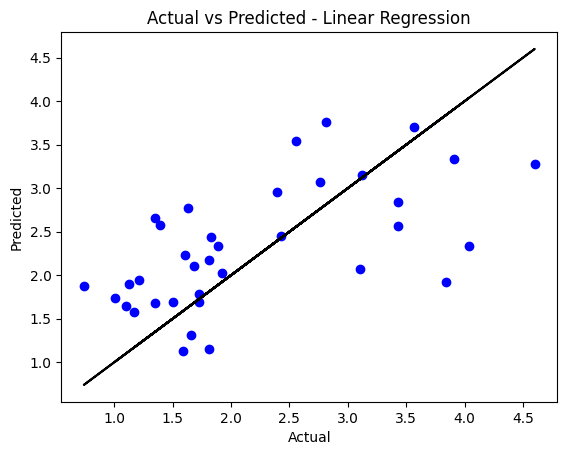

Linear Regression {'MSE': -0.9206067251884482, 'RMSE': -0.9533356871141307, 'MAE': -0.7361155834394028, 'R2': 0.25343397868222545, 'NMAE': -0.31098671443251086}


In [22]:
plot_actual_vs_predicted(model2, X_train_scaled, y_train, X_test_scaled, y_test, 'Linear Regression')
print("Linear Regression", cv_results_model2)

## Ridge Regression

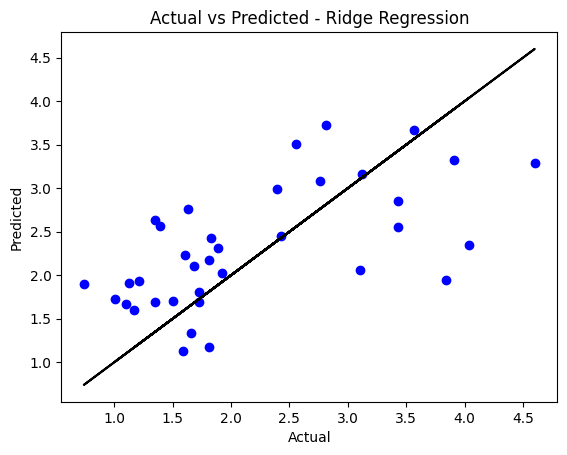

Ridge Regression {'MSE': -0.9623104797966796, 'RMSE': -0.9781562828535145, 'MAE': -0.7279972477676417, 'R2': 0.19142106480681956, 'NMAE': -0.3090957560164751}


In [23]:
plot_actual_vs_predicted(model3, X_train_scaled, y_train, X_test_scaled, y_test, 'Ridge Regression')
print("Ridge Regression", cv_results_model3)